In [ ]:
from google.colab import drive
drive.mount('/content/drive')


!pip install deepchem rdkit matplotlib networkx

import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from deepchem.feat import MolGraphConvFeaturizer
from deepchem.feat import CircularFingerprint
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from deepchem.feat import ConvMolFeaturizer
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
import deepchem as dc
from sklearn.manifold import TSNE
#from drive.MyDrive.code.methods import *
from drive.MyDrive.code.methods_fingerprints import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [ ]:
!pip freeze

absl-py==1.4.0
accelerate==0.32.1
aiohappyeyeballs==2.4.0
aiohttp==3.10.5
aiosignal==1.3.1
alabaster==0.7.16
albucore==0.0.13
albumentations==1.4.14
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.18.0
asn1crypto==1.5.1
astropy==6.1.2
astropy-iers-data==0.2024.8.19.0.32.16
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.6.2
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.15.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.4.3
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.7.4
cffi==1.17.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
clarabel==0.9.0
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.18.1
cloudpickle==2.2.1
cmake==3.30.2
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confe

In [ ]:
smiles_tr,smiles_test, logSweeter_tr, logSweeter_test, families_tr, families_test = load_data("/content/drive/MyDrive/code/SweetnersDB.xlsx")

Index(['Name', 'logSw', 'Chemical family', 'Dataset', 'Smiles'], dtype='object')


In [ ]:
X_tr,X_test,scaler_X = prepare_fingerprint(smiles_tr,smiles_test)
y_tr,y_test,scaler_y = prepare_targets(logSweeter_tr,logSweeter_test)

[09:40:15] DEPRECATION WARNING: please use MorganGenerator
[09:40:15] DEPRECATION WARNING: please use MorganGenerator
[09:40:15] DEPRECATION WARNING: please use MorganGenerator
[09:40:15] DEPRECATION WARNING: please use MorganGenerator
[09:40:15] DEPRECATION WARNING: please use MorganGenerator
[09:40:15] DEPRECATION WARNING: please use MorganGenerator
[09:40:15] DEPRECATION WARNING: please use MorganGenerator
[09:40:15] DEPRECATION WARNING: please use MorganGenerator
[09:40:15] DEPRECATION WARNING: please use MorganGenerator
[09:40:15] DEPRECATION WARNING: please use MorganGenerator
[09:40:15] DEPRECATION WARNING: please use MorganGenerator
[09:40:15] DEPRECATION WARNING: please use MorganGenerator
[09:40:15] DEPRECATION WARNING: please use MorganGenerator
[09:40:15] DEPRECATION WARNING: please use MorganGenerator
[09:40:15] DEPRECATION WARNING: please use MorganGenerator
[09:40:15] DEPRECATION WARNING: please use MorganGenerator
[09:40:15] DEPRECATION WARNING: please use MorganGenerat

# régression SVR

In [ ]:
# Créer et entraîner le modèle SVR
svr = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr.fit(X_tr, y_tr)

SVR(C=100)

In [ ]:
# Évaluer le modèle
score = svr.score(X_test, y_test)
print(f"Score R² du modèle: {score:.2f}")

Score R² du modèle: 0.55


In [ ]:
# Faire des prédictions
y_pred_train = svr.predict(X_tr)
y_pred_test = svr.predict(X_test)


In [ ]:
# Inverser la normalisation pour obtenir les valeurs réelles
y_pred_train = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1)).ravel()
y_pred_test = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)).ravel()
y_train = scaler_y.inverse_transform(y_tr.reshape(-1, 1)).ravel()
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

In [ ]:
X = np.vstack((X_tr,X_test))
y = np.hstack((y_train,y_test))

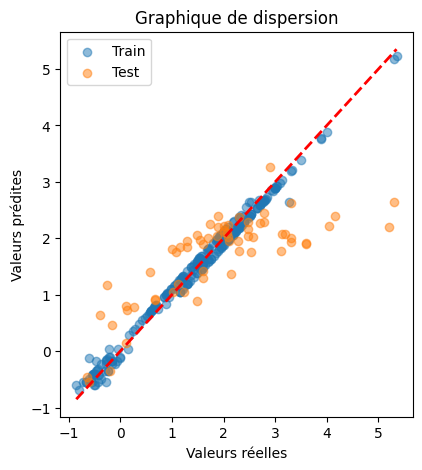

In [ ]:
# Visualisation : Graphique de dispersion
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Train')
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Graphique de dispersion')
plt.legend()

In [ ]:


# Afficher les métriques de performance
from sklearn.metrics import r2_score, mean_squared_error
print(f"R² (Train): {r2_score(y_train, y_pred_train):.4f}")
print(f"R² (Test): {r2_score(y_test, y_pred_test):.4f}")
print(f"MSE (Train): {mean_squared_error(y_train, y_pred_train):.4f}")
print(f"MSE (Test): {mean_squared_error(y_test, y_pred_test):.4f}")

R² (Train): 0.9888
R² (Test): 0.5454
MSE (Train): 0.0148
MSE (Test): 0.7658


# Scoring regression logistique


In [ ]:
sweet_thr = 0
ytr = pd.DataFrame(y_tr,columns=['label'])
target_tr =  ytr['label'].apply(lambda x: 0 if x <= sweet_thr else 1)

In [ ]:
ytest = pd.DataFrame(y_test,columns=['label'])
target_test =  ytest['label'].apply(lambda x: 0 if x <= sweet_thr else 1)

In [ ]:
# Normalisation des données
'''scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Création et entraînement du modèle de régression logistique
model = LogisticRegression()
model.fit(X_tr, target_tr)

LogisticRegression()

In [ ]:
# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(target_test, y_pred)
conf_matrix = confusion_matrix(target_test, y_pred)
class_report = classification_report(target_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.796875
Confusion Matrix:
[[16  5]
 [ 8 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71        21
           1       0.88      0.81      0.84        43

    accuracy                           0.80        64
   macro avg       0.77      0.79      0.78        64
weighted avg       0.81      0.80      0.80        64



In [ ]:
X_combined = np.vstack((X_tr, X_test))
y_combined = np.concatenate((y_tr, y_test))

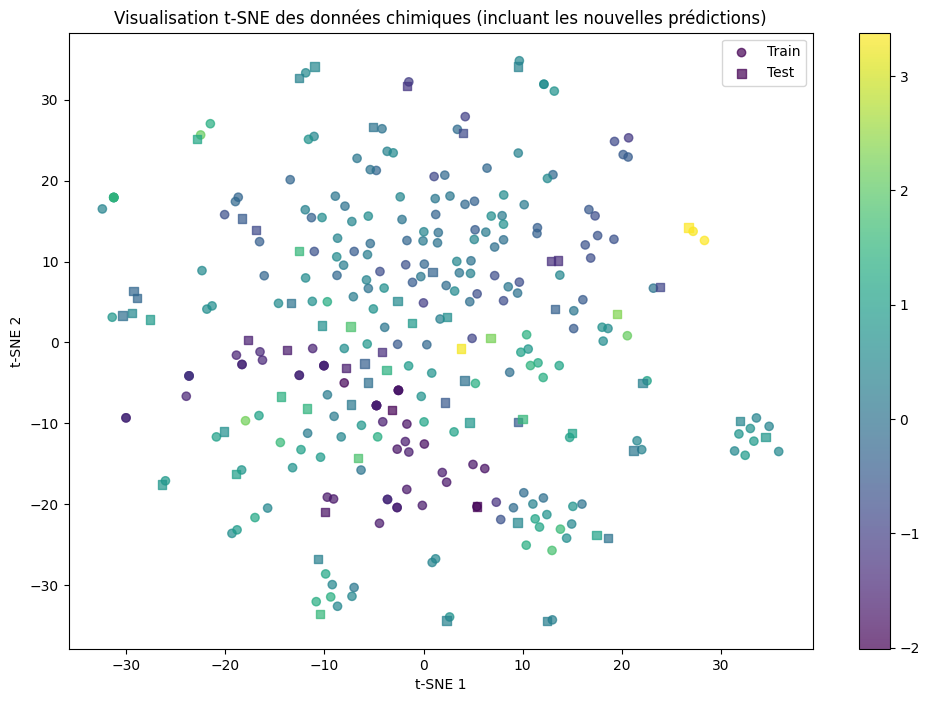

In [ ]:
X_combined = np.vstack((X_tr, X_test))
y_combined = np.concatenate((y_tr, y_test))
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_combined)

# 8. Visualisation
plt.figure(figsize=(12, 8))

# Données d'entraînement
scatter_train = plt.scatter(X_tsne[:len(X_tr), 0], X_tsne[:len(X_tr), 1],
                            c=y_tr, cmap='viridis', alpha=0.7, label='Train')

# Données de test
scatter_test = plt.scatter(X_tsne[len(X_tr):len(X_tr)+len(X_test), 0],
                           X_tsne[len(X_tr):len(X_tr)+len(X_test), 1],
                           c=y_test, cmap='viridis', marker='s', alpha=0.7, label='Test')
plt.colorbar(scatter_train)
plt.title('Visualisation t-SNE des données chimiques (incluant les nouvelles prédictions)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()


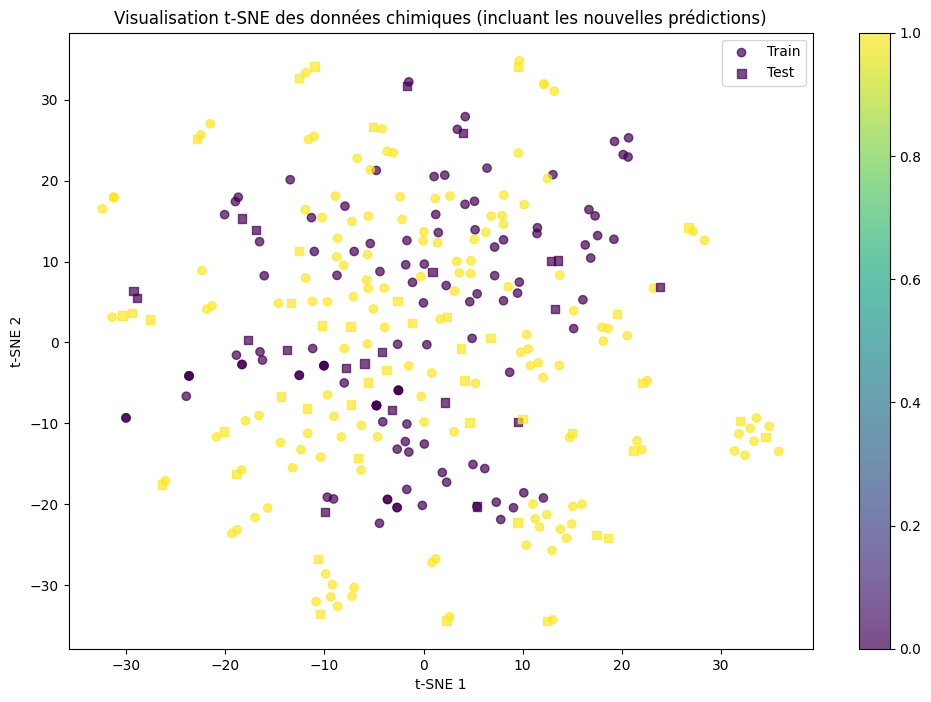

In [ ]:
X_combined = np.vstack((X_tr, X_test))
y_combined = np.concatenate((y_tr, y_test))
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_combined)

# 8. Visualisation
plt.figure(figsize=(12, 8))

# Données d'entraînement
scatter_train = plt.scatter(X_tsne[:len(X_tr), 0], X_tsne[:len(X_tr), 1],
                            c=target_tr, cmap='viridis', alpha=0.7, label='Train')

# Données de test
scatter_test = plt.scatter(X_tsne[len(X_tr):len(X_tr)+len(X_test), 0],
                           X_tsne[len(X_tr):len(X_tr)+len(X_test), 1],
                           c=target_test, cmap='viridis', marker='s', alpha=0.7, label='Test')
plt.colorbar(scatter_train)
plt.title('Visualisation t-SNE des données chimiques (incluant les nouvelles prédictions)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()


# scoring arbre de décision


In [ ]:
sweet_thr = 0
ytr = pd.DataFrame(y_tr,columns=['label'])
target_tr =  ytr['label'].apply(lambda x: 0 if x <= sweet_thr else 1)
ytest = pd.DataFrame(y_test,columns=['label'])
target_test =  ytest['label'].apply(lambda x: 0 if x <= sweet_thr else 1)
from sklearn.tree import DecisionTreeClassifier
# Création et entraînement du modèle d'arbre de décision
model = DecisionTreeClassifier(random_state=42)
model.fit(X_tr, target_tr)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(target_test, y_pred)
conf_matrix = confusion_matrix(target_test, y_pred)
class_report = classification_report(target_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8125
Confusion Matrix:
[[14  7]
 [ 5 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70        21
           1       0.84      0.88      0.86        43

    accuracy                           0.81        64
   macro avg       0.79      0.78      0.78        64
weighted avg       0.81      0.81      0.81        64



In [ ]:
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


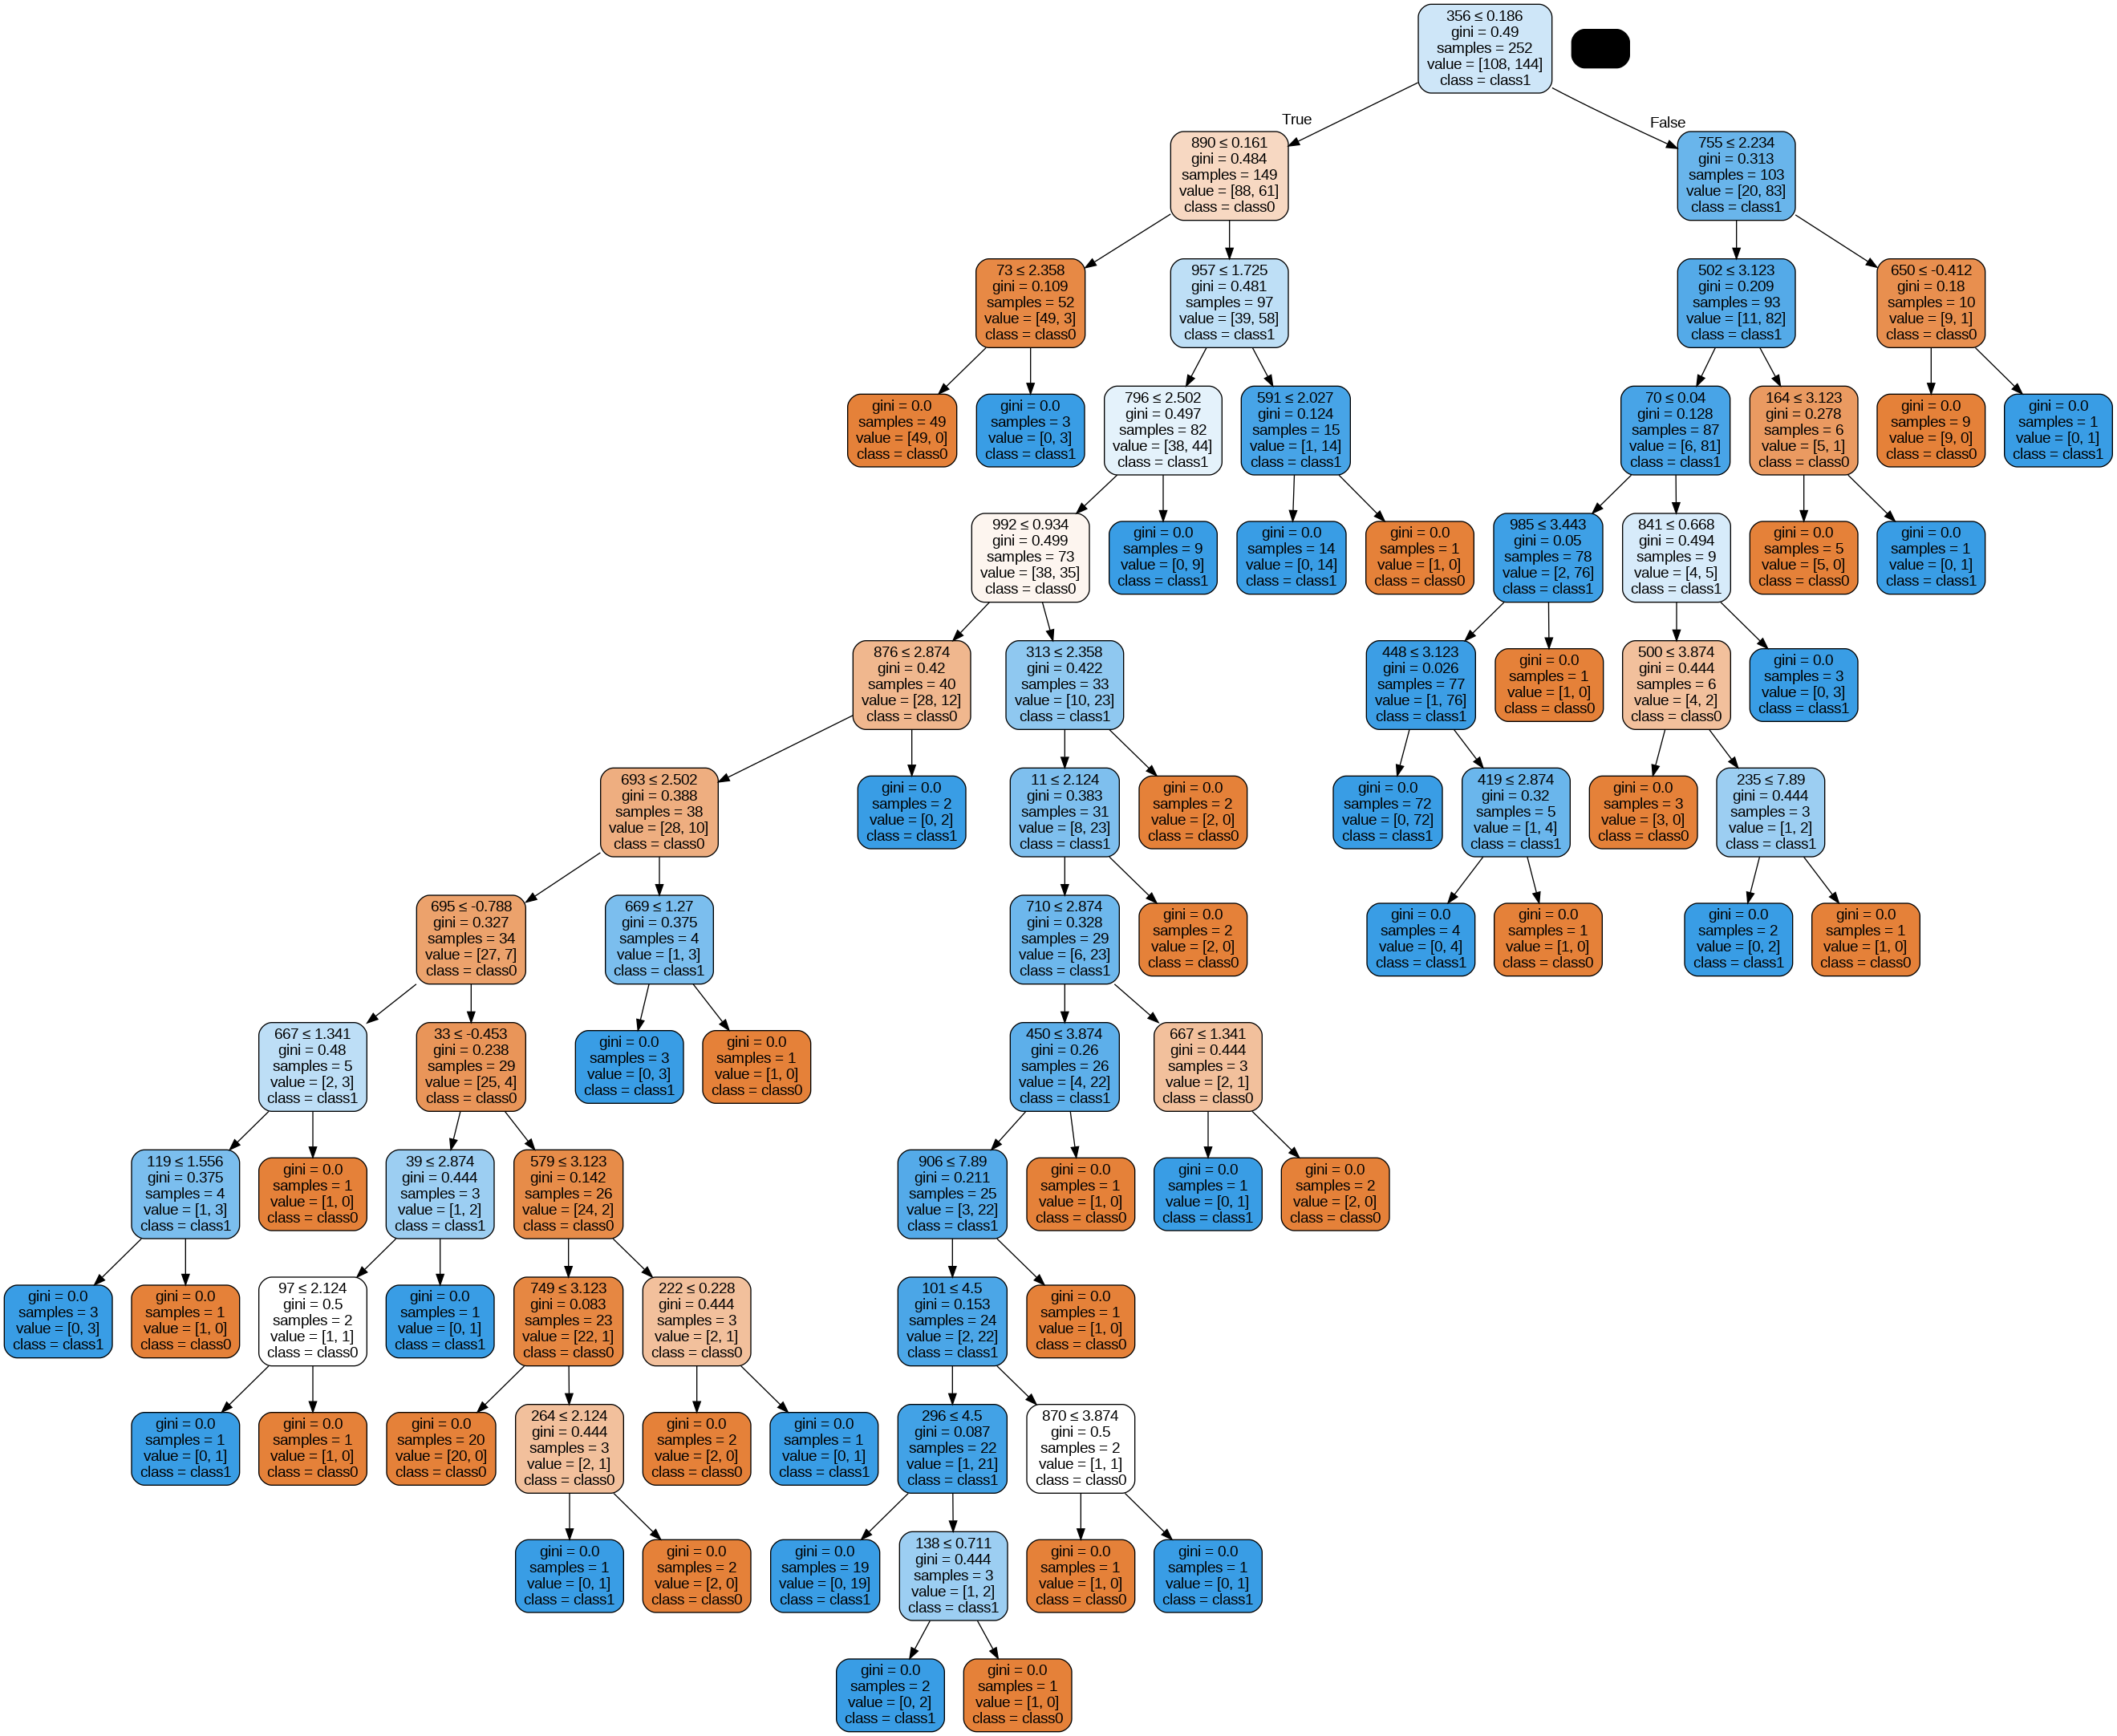

In [ ]:
!pip install pydotplus
!apt-get install graphviz
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Visualisation de l'arbre de décision
# Limitez la visualisation à un sous-ensemble de caractéristiques si nécessaire
Xtr = pd.DataFrame(X_tr)
feature_names = Xtr.columns
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=feature_names,
    class_names=['class0', 'class1'],  # Remplacez par vos classes réelles
    filled=True,
    rounded=True,
    special_characters=True
)

# Affichage de l'arbre
#graph = graphviz.Source(dot_data)
#graph.render("decision_tree")  # Sauvegarde l'arbre dans un fichier nommé "decision_tree"
#graph.view()  # Affiche l'arbre
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

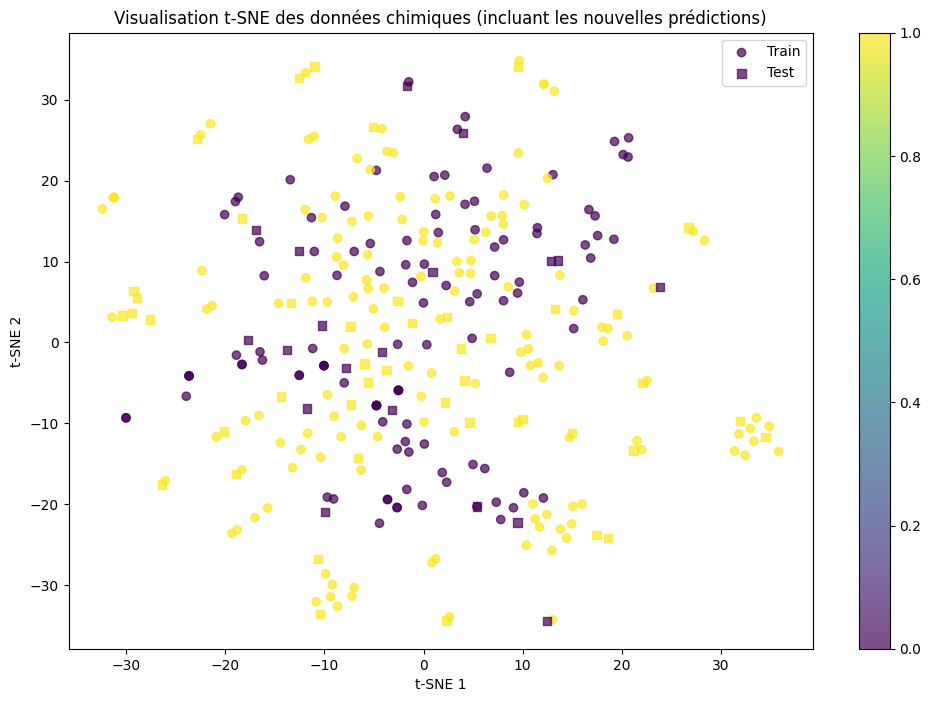

In [ ]:
X_combined = np.vstack((X_tr, X_test))
y_combined = np.concatenate((target_tr,y_pred))
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_combined)

# Visualisation
plt.figure(figsize=(12, 8))

# Données d'entraînement
scatter_train = plt.scatter(X_tsne[:len(X_tr), 0], X_tsne[:len(X_tr), 1],
                            c=target_tr, cmap='viridis', alpha=0.7, label='Train')

# Données de test
scatter_test = plt.scatter(X_tsne[len(X_tr):len(X_tr)+len(X_test), 0],
                           X_tsne[len(X_tr):len(X_tr)+len(X_test), 1],
                           c=y_pred, cmap='viridis', marker='s', alpha=0.7, label='Test')
plt.colorbar(scatter_train)
plt.title('Visualisation t-SNE des données chimiques (incluant les nouvelles prédictions)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()


# Scoring random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
 # Création et entraînement du modèle de forêt aléatoire
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_tr, target_tr)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(target_test, y_pred)
conf_matrix = confusion_matrix(target_test, y_pred)
class_report = classification_report(target_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.859375
Confusion Matrix:
[[15  6]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        21
           1       0.87      0.93      0.90        43

    accuracy                           0.86        64
   macro avg       0.85      0.82      0.83        64
weighted avg       0.86      0.86      0.86        64



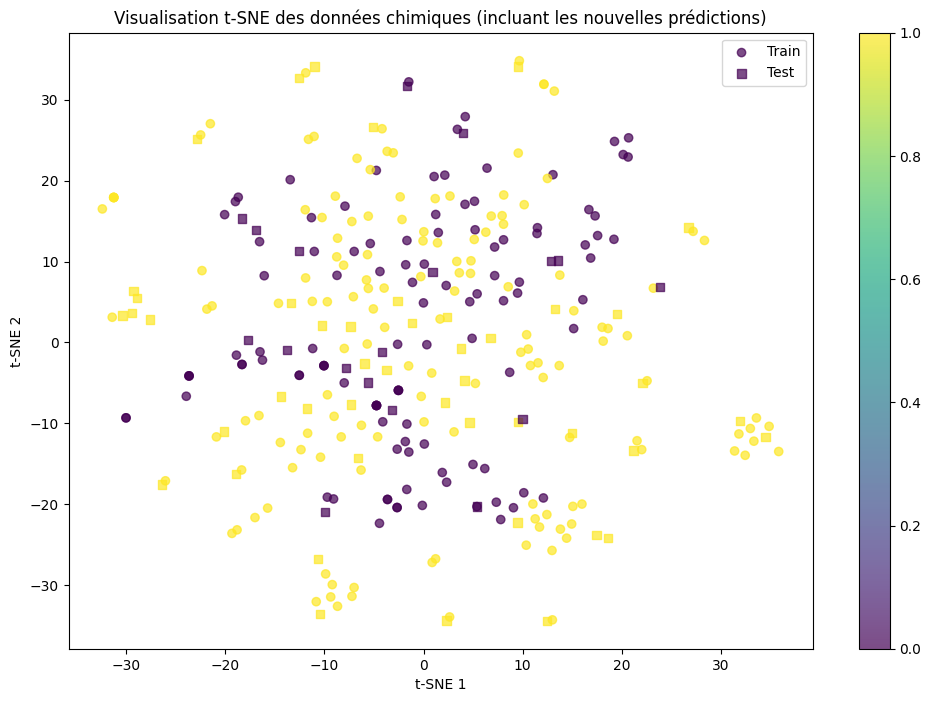

In [ ]:
X_combined = np.vstack((X_tr, X_test))
y_combined = np.concatenate((target_tr,y_pred))
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_combined)

# 8. Visualisation
plt.figure(figsize=(12, 8))

# Données d'entraînement
scatter_train = plt.scatter(X_tsne[:len(X_tr), 0], X_tsne[:len(X_tr), 1],
                            c=target_tr, cmap='viridis', alpha=0.7, label='Train')

# Données de test
scatter_test = plt.scatter(X_tsne[len(X_tr):len(X_tr)+len(X_test), 0],
                           X_tsne[len(X_tr):len(X_tr)+len(X_test), 1],
                           c=y_pred, cmap='viridis', marker='s', alpha=0.7, label='Test')
plt.colorbar(scatter_train)
plt.title('Visualisation t-SNE des données chimiques (incluant les nouvelles prédictions)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()


# Non supervisé

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Nombre de clusters (2 classes)
n_clusters = 2

# Appliquer K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
train_labels = kmeans.fit_predict(X_tr)

# Calculer le coefficient de silhouette
silhouette_avg = silhouette_score(X_tr, train_labels)

print(f"Coefficient de silhouette pour {n_clusters} clusters : {silhouette_avg:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Coefficient de silhouette pour 2 clusters : 0.12


In [ ]:
# Prédiction des clusters pour les nouvelles données
new_labels = kmeans.predict(X_test)

# Calcul des distances aux centroïdes
new_distances = kmeans.transform(X_test)

for i, (label, distances) in enumerate(zip(new_labels, new_distances)):
    print(f"Nouvelle donnée {i+1}:")
    print(f"  Cluster assigné: {label}")
    print(f"  Distances aux centroïdes: {distances}")
    print(f"  Distance au centroïde assigné: {distances[label]:.2f}")
    print()

Nouvelle donnée 1:
  Cluster assigné: 1
  Distances aux centroïdes: [11.98482476 11.53278896]
  Distance au centroïde assigné: 11.53

Nouvelle donnée 2:
  Cluster assigné: 1
  Distances aux centroïdes: [22.56992106 19.09719177]
  Distance au centroïde assigné: 19.10

Nouvelle donnée 3:
  Cluster assigné: 1
  Distances aux centroïdes: [28.94457409 28.82786224]
  Distance au centroïde assigné: 28.83

Nouvelle donnée 4:
  Cluster assigné: 0
  Distances aux centroïdes: [27.67531724 29.30844036]
  Distance au centroïde assigné: 27.68

Nouvelle donnée 5:
  Cluster assigné: 0
  Distances aux centroïdes: [10.15857975 14.00447429]
  Distance au centroïde assigné: 10.16

Nouvelle donnée 6:
  Cluster assigné: 0
  Distances aux centroïdes: [19.84958048 22.21223628]
  Distance au centroïde assigné: 19.85

Nouvelle donnée 7:
  Cluster assigné: 0
  Distances aux centroïdes: [14.47189389 19.90324139]
  Distance au centroïde assigné: 14.47

Nouvelle donnée 8:
  Cluster assigné: 0
  Distances aux centro

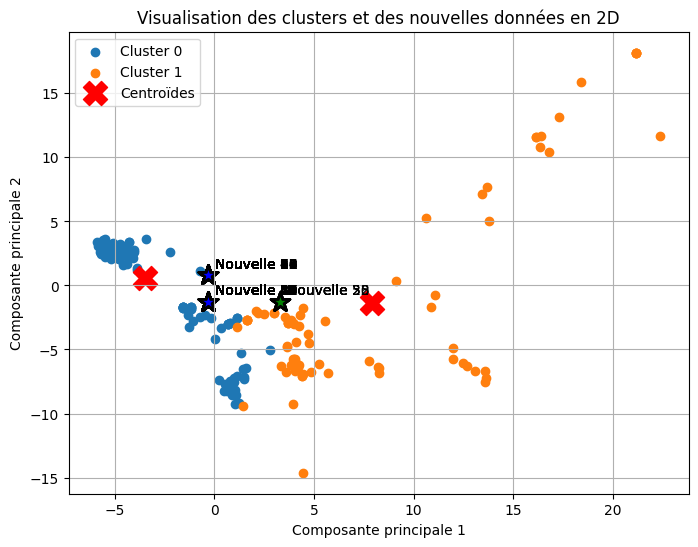

Nouvelle donnée 1:
  Données originales: [-0.30151134 -1.27475488 -0.21364258 ... -0.10976426 -0.08944272
 -0.06311944]
  Cluster assigné: 1
  Couleur assignée: green
  Coordonnées PCA: [ 1.46248425 -2.7364683 ]

Nouvelle donnée 2:
  Données originales: [ 3.31662479 -1.27475488 -0.21364258 ... -0.10976426 -0.08944272
 -0.06311944]
  Cluster assigné: 1
  Couleur assignée: green
  Coordonnées PCA: [ 5.56028511 -2.78559774]

Nouvelle donnée 3:
  Données originales: [-0.30151134 -1.27475488 -0.21364258 ... -0.10976426 -0.08944272
 -0.06311944]
  Cluster assigné: 1
  Couleur assignée: green
  Coordonnées PCA: [ 2.83989688 -2.3519914 ]

Nouvelle donnée 4:
  Données originales: [-0.30151134  0.78446454 -0.21364258 ... -0.10976426 -0.08944272
 -0.06311944]
  Cluster assigné: 0
  Couleur assignée: blue
  Coordonnées PCA: [-1.26564953 -0.96563443]

Nouvelle donnée 5:
  Données originales: [-0.30151134  0.78446454 -0.21364258 ... -0.10976426 -0.08944272
 -0.06311944]
  Cluster assigné: 0
  Couleu

In [ ]:
from sklearn.decomposition import PCA
# Réduction de dimension avec PCA pour visualisation 2D
pca = PCA(n_components=2)
train_data_pca = pca.fit_transform(X_tr)


new_data_pca = pca.transform(X_test)

# Prédiction des clusters pour les nouvelles données
new_labels = kmeans.predict(X_test)



# Visualisation des clusters
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_points = train_data_pca[train_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

# Ajout des centroïdes
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X', label='Centroïdes')

# Définition des couleurs pour les clusters
colors = ['blue', 'green', 'red', 'cyan', 'magenta']  # Ajoutez plus de couleurs si nécessaire
# Affichage des nouvelles données avec la couleur de leur cluster assigné
for i, (point, label) in enumerate(zip(X_test, new_labels)):
    plt.scatter(point[0], point[1], s=200, c=colors[label], edgecolor='black', linewidth=2, marker='*')
    plt.annotate(f'Nouvelle {i+1}', (point[0], point[1]), xytext=(5, 5), textcoords='offset points')

plt.title('Visualisation des clusters et des nouvelles données en 2D')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend()
plt.grid(True)
plt.show()

# Affichage des résultats pour les nouvelles données
for i, (label, point) in enumerate(zip(new_labels, X_test)):
    print(f"Nouvelle donnée {i+1}:")
    print(f"  Données originales: {point}")
    print(f"  Cluster assigné: {label}")
    print(f"  Couleur assignée: {colors[label]}")
    print(f"  Coordonnées PCA: {new_data_pca[i]}")
    print()

# T-sne

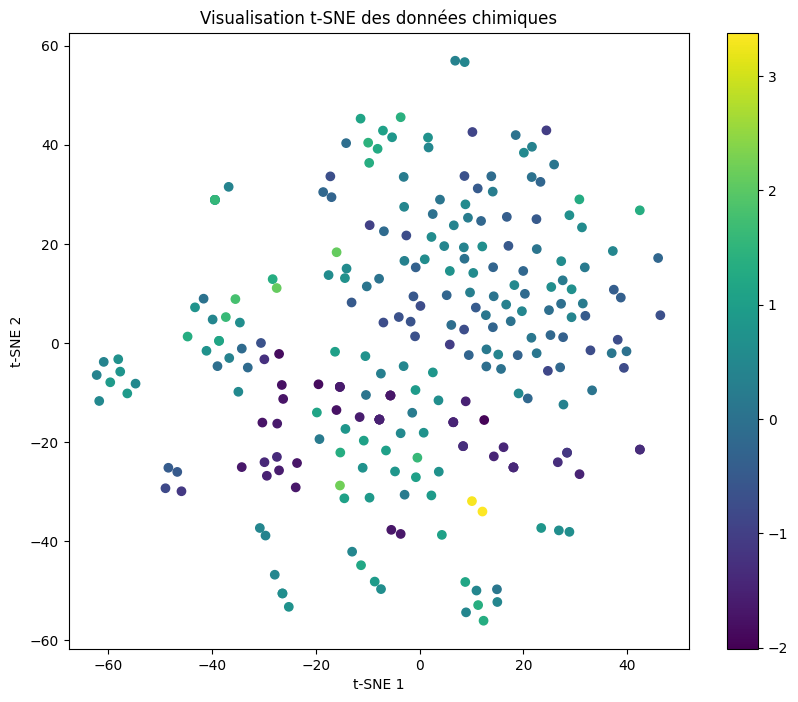

In [ ]:
from sklearn.manifold import TSNE
# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_tr)




# Application de t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)




# Visualisation
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_tr, cmap='viridis')
plt.colorbar(scatter)
plt.title('Visualisation t-SNE des données chimiques')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()